## Credit EDA Case Study

##### problem statement :

To identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

In [2]:
#Importing dataset 
application_data= pd.read_csv(r"C:\Users\Deepak Ramana\Downloads\credit case eda case study\application_data.csv")
previous_application=pd.read_csv(r"C:\Users\Deepak Ramana\Downloads\credit case eda case study\previous_application.csv")

### Data Understanding

#### Data Understanding on Application data

In [3]:
application_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
application_data.shape

(307511, 122)

In [5]:
application_data_columns=application_data.columns
application_data_column_list=application_data_columns.to_list()
application_data_columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
#finding  out numericl and categorical variable
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns    
    return(categorical_features,numerical_features)
           
#calling function to identify two different variables
print("\033[1mFollowing columns belong to Category\033[0m", type_features(application_data)[0])   
print("\033[1mFollowing columns belong to Numerical\033[0m", type_features(application_data)[1]) 

Following columns belong to Category Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
Following columns belong to Numerical Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)


In [7]:
#application_data.describe().T

#### Data Understanding on Previous Application

In [8]:
previous_application.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
previous_application.shape

(1670214, 37)

In [10]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### Data Cleaning

#### Data Cleaning on Application data set

In [11]:
#function to find missing values
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [12]:
#Finding missing values and its percentage in Application data set

application_missing_data= missing_data(application_data).head(64)
print(application_missing_data.head(10))

                           Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
FONDKAPREMONT_MODE        210295  68.386172
LIVINGAPARTMENTS_MEDI     210199  68.354953
LIVINGAPARTMENTS_MODE     210199  68.354953
LIVINGAPARTMENTS_AVG      210199  68.354953


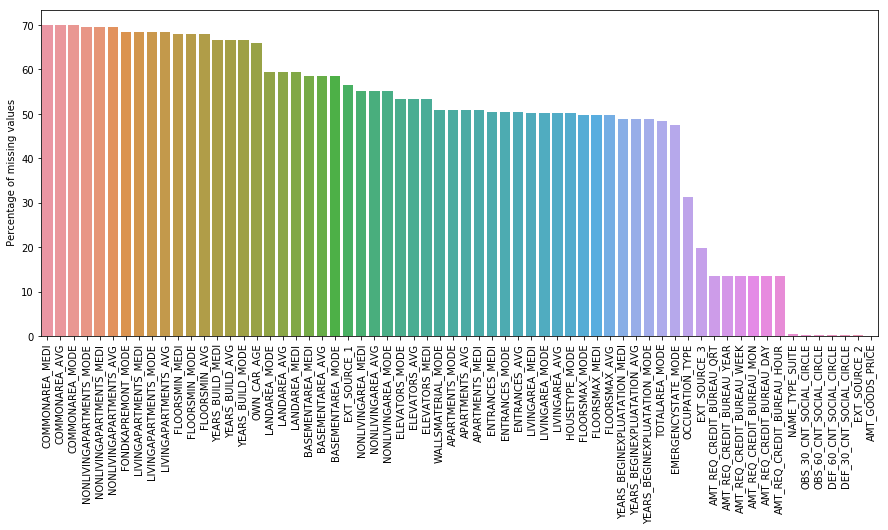

In [13]:
#visualization by plotting missing percentage over columns
plt.figure(figsize=(15,6))
sns.barplot(x=application_missing_data.index, y=application_missing_data["Percent"] ).set_xticklabels(application_missing_data.index,rotation=90)
plt.ylabel(" Percentage of missing values")
plt.show()

In [14]:
#getting columns whose null values are greater than 45% 
application_missing_data_columns=application_missing_data[application_missing_data['Percent']>45].index
application_missing_data_columns

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG',
       'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE',
       'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE',
       'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI

In [15]:
#Removing the columns which has more than 45% null values from actual column values list
#Removing all the columns ( "Flag document") since it doesnot add any value to analysis 
analysis_list=[]
for i in application_data_columns :
    if (i not in application_missing_data_columns)  and  (i.find("FLAG_DOCUMENT") == -1):
        analysis_list.append(i)
analysis_list #final list of columns that are used for analysis

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

In [16]:
#creating a new dataframe with required column values

test_df= application_data[analysis_list]
print("\033[1mThe number of columns after removing unneccesary columns are\033[0m",test_df.shape[1])
test_df.head(5)

The number of columns after removing unneccesary columns are 53


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Data Cleaning on Application data set

In [17]:
previous_application_missing_data= missing_data(previous_application)
previous_application_missing_data.head(10)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


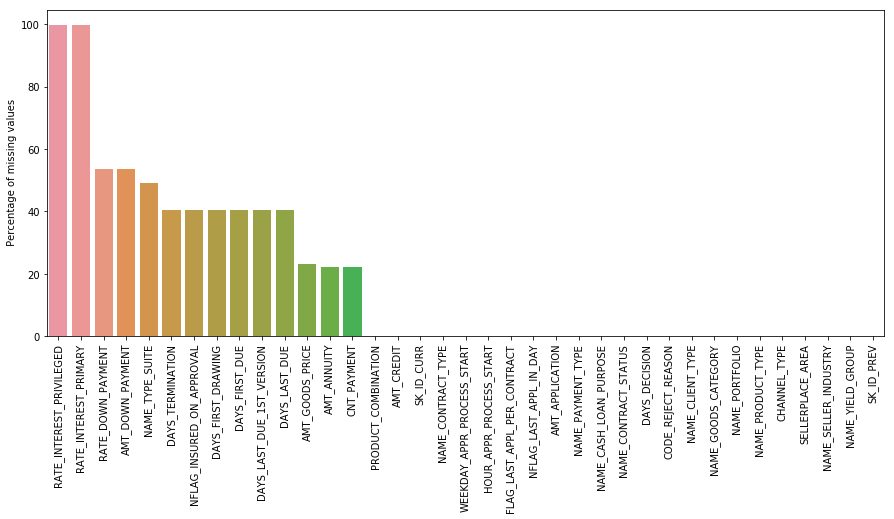

In [18]:
#visualization by plotting missing percentage over columns
plt.figure(figsize=(15,6))
sns.barplot(x=previous_application_missing_data.index, y=previous_application_missing_data["Percent"] ).set_xticklabels(previous_application_missing_data.index,rotation=90)
plt.ylabel(" Percentage of missing values")
plt.show()

#### Missing value treatment

In [19]:
test_df_missing = missing_data(test_df)
test_df_missing[test_df_missing["Percent"]>0]

,Total,Percent
OCCUPATION_TYPE,96391,31.345545
EXT_SOURCE_3,60965,19.825307
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
NAME_TYPE_SUITE,1292,0.420148
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021


In [20]:
#Function to identify statistic to impute missing data
def imputing_missing(data):
    print(test_df[data].describe())
    plt.figure(figsize=(8,3))
    sns.boxplot(test_df[data])
    plt.show()
    
#imputing the test_df[data] with the corresponding statistic parameter(mean/median)
def impute(data,technique):
    test_df[data]=test_df[data].fillna(technique)

###### Treating missing value on AMT_GOODS_PRICE

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


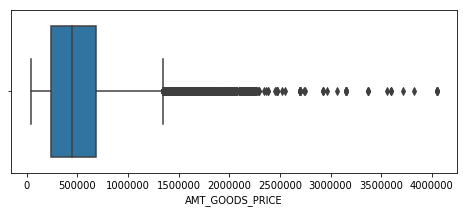

In [21]:
#Treating missing value on AMT_GOODS_PRICE
imputing_missing("AMT_GOODS_PRICE")

since, there are outliers present in the AMT_GOODS_PRICE column, we are imputing it with Median value

In [22]:
#imputing the null values with median value
impute("AMT_GOODS_PRICE",test_df["AMT_GOODS_PRICE"].median())

###### Treating missing value on EXT_SOURCE_2

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


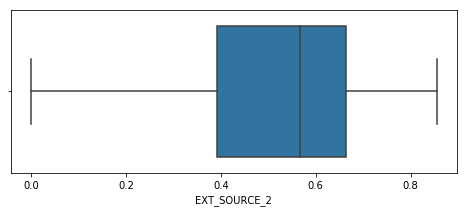

In [23]:
imputing_missing("EXT_SOURCE_2")

Imputing the missing data with "Mean" as standard deviation is less and there is no outliers present in the data

In [ ]:
#imputing the null values with mean value
impute("EXT_SOURCE_2",test_df["EXT_SOURCE_2"].mean())

###### Treating missing value on AMT_ANNUITY

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


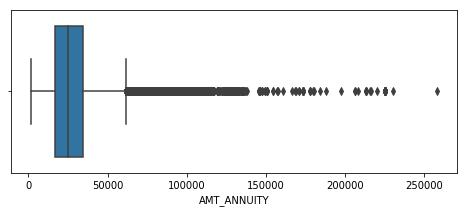

In [ ]:
imputing_missing('AMT_ANNUITY')

Imputing the missing value with "Median" value, as there are outliers and standard deviation is high 

In [ ]:
impute("AMT_ANNUITY",test_df["AMT_ANNUITY"].median())

###### Treating missing value on SOCIAL_CIRCLE variables

In [ ]:
print(test_df.groupby("OBS_60_CNT_SOCIAL_CIRCLE")["OBS_60_CNT_SOCIAL_CIRCLE"].count().head(5))
print(test_df.groupby("OBS_30_CNT_SOCIAL_CIRCLE")["OBS_30_CNT_SOCIAL_CIRCLE"].count().head(5))
print(test_df.groupby("DEF_60_CNT_SOCIAL_CIRCLE")["DEF_60_CNT_SOCIAL_CIRCLE"].count().head(5))
print(test_df.groupby("DEF_30_CNT_SOCIAL_CIRCLE")["DEF_30_CNT_SOCIAL_CIRCLE"].count().head(5))


OBS_60_CNT_SOCIAL_CIRCLE
0.0    164666
1.0     48870
2.0     29766
3.0     20215
4.0     13946
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64
OBS_30_CNT_SOCIAL_CIRCLE
0.0    163910
1.0     48783
2.0     29808
3.0     20322
4.0     14143
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64
DEF_60_CNT_SOCIAL_CIRCLE
0.0    280721
1.0     21841
2.0      3170
3.0       598
4.0       135
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64
DEF_30_CNT_SOCIAL_CIRCLE
0.0    271324
1.0     28328
2.0      5323
3.0      1192
4.0       253
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64


Since,all the columns has more number of count 0, we are imputing it with the mode and since it is Zero, it may not affect the analysis

In [ ]:
impute("OBS_60_CNT_SOCIAL_CIRCLE",0)
impute("OBS_30_CNT_SOCIAL_CIRCLE",0)
impute("DEF_60_CNT_SOCIAL_CIRCLE",0)
impute("DEF_30_CNT_SOCIAL_CIRCLE",0)

In [ ]:
#checking the null values of the imputed column
test_df[["EXT_SOURCE_2",'AMT_GOODS_PRICE','AMT_ANNUITY',"OBS_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE"]].isnull().values.any()

False

In [ ]:
#checking null values in Gender column
test_df.groupby("CODE_GENDER")["CODE_GENDER"].count()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Clearly, XNA is missing value 

In [ ]:
male_percentage = round(test_df[test_df["CODE_GENDER"]== "M"].count()[0]/test_df.shape[0],2)
female_percentage = round(test_df[test_df["CODE_GENDER"]== "F"].count()[0]/test_df.shape[0],2)

print("Since male percentage is",male_percentage,"and female percentage is ",female_percentage," and it is in the ratio 1:3, so randomly imputing 1 one male and 3 female to the four missing values")

Since male percentage is 0.34 and female percentage is  0.66  and it is in the ratio 1:3, so randomly imputing 1 one male and 3 female to the four missing values


In [ ]:
#Getting the SK_ID for rows with missing gender 
print(test_df[test_df["CODE_GENDER"]== "XNA"]["SK_ID_CURR"].values)

#imputing the gender
test_df.loc[test_df.SK_ID_CURR == 141289, 'CODE_GENDER'] = 'F'
test_df.loc[test_df.SK_ID_CURR == 319880, 'CODE_GENDER'] = 'F'
test_df.loc[test_df.SK_ID_CURR == 196708, 'CODE_GENDER'] = 'F'
test_df.loc[test_df.SK_ID_CURR == 144669, 'CODE_GENDER'] = 'M'

#checking null values in Gender column
test_df.groupby("CODE_GENDER")["CODE_GENDER"].count()

[141289 144669 196708 319880]


CODE_GENDER
F    202451
M    105060
Name: CODE_GENDER, dtype: int64

In [ ]:
#test_df.to_csv(r"C:\Users\Deepak Ramana\Downloads\credit case eda case study\test_df.csv")

#### DataType check

In [ ]:
test_df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

All datatypes are in required format

In [ ]:
#finding  out numericl and categorical variable by calling pre defined user function type_features()
type_features(test_df)


print("\033[1mFollowing columns belong to Category\033[0m", type_features(test_df)[0])   
print("\033[1mFollowing columns belong to Numerical\033[0m", type_features(test_df)[1]) 

Following columns belong to Category Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')
Following columns belong to Numerical Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE

### Outlier Detection

Analysing Numerical columns to check outliers in data set
   

Text(0.5, 1.0, 'OBS_60_CNT_SOCIAL_CIRCLE')

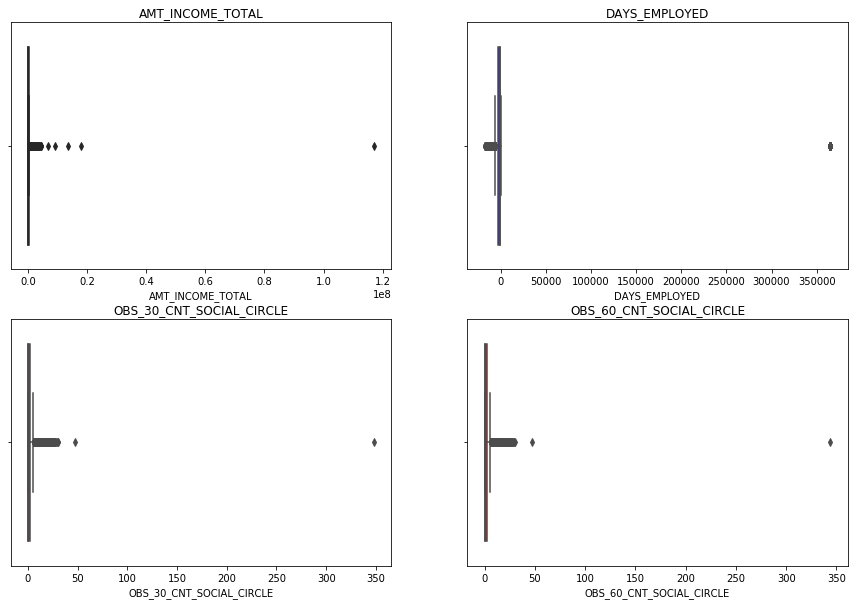

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(2,2, figsize=(15, 10))

#Box plot on amount income total
sns.boxplot(test_df['AMT_INCOME_TOTAL'], color="g", ax=ax[0,0]).set_title('AMT_INCOME_TOTAL')

#Box plot on Days employed
sns.boxplot(test_df['DAYS_EMPLOYED'],  color="b", ax=ax[0,1]).set_title('DAYS_EMPLOYED')

#Box plot on OBS_30_CNT_SOCIAL_CIRCLE 
sns.boxplot(test_df['OBS_30_CNT_SOCIAL_CIRCLE'], color="r", ax=ax[1,0]).set_title('OBS_30_CNT_SOCIAL_CIRCLE')

#Box plot on OBS_60_CNT_SOCIAL_CIRCLE 
sns.boxplot(test_df['OBS_60_CNT_SOCIAL_CIRCLE'], color="r", ax=ax[1,1]).set_title('OBS_60_CNT_SOCIAL_CIRCLE')

Clearly, there are outliers in all the plots above, as there is no proper box plot, following we will treat the outliers

#### Outlier treatment   

In [ ]:
def outlier_treatment(data):
    #outlier identification through IQR method
    
    #25th and 75th quantile
    quantile_25 =np.percentile(test_df[data],25)
    quantile_75 = np.percentile(test_df[data],75)

    #Interquartile difference
    IQR= quantile_75 - quantile_25

    #outlier cutoff
    cut_off = IQR * 1.5
    Lower_quartile = quantile_25 - cut_off
    Upper_quartile = quantile_75 + cut_off

    #creating a new dataframe removing outliers 
    not_outliers=test_df[(test_df[data]<Upper_quartile) &  (test_df[data]>Lower_quartile) ]
    outliers=test_df[~((test_df[data]<Upper_quartile) &  (test_df[data]>Lower_quartile)) ]
    print("Total number of outliers",outliers.shape[0] )
    print("Total number of non-outliers", not_outliers.shape[0])
    print("Lower quartile",Lower_quartile)
    print("Upper quartile",Upper_quartile)

    #Plotting after removal of outliers 
    #not_outliers.sort_values(by=data,ascending= False)
    print("\n")
    print("\033[1mPlot after removing outliers\033[0m")
    plt.figure(figsize=(10,3))
    sns.boxplot(not_outliers[data]).set_title(data)

Total number of outliers 15825
Total number of non-outliers 291686
Lower quartile -22500.0
Upper quartile 337500.0


Plot after removing outliers


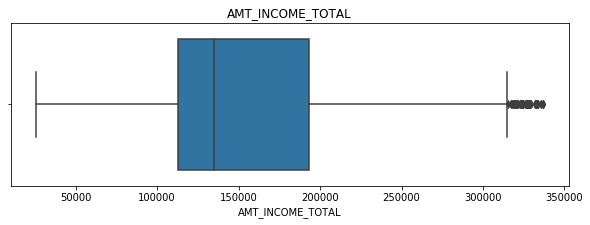

In [ ]:
#calling function for Outlier treatment on Income of the client
#Clearly from the previous plot, there is an outlier in the annual income of client dataset

outlier_treatment("AMT_INCOME_TOTAL")

Total number of outliers 29524
Total number of non-outliers 277987
Lower quartile -3.0
Upper quartile 5.0


Plot after removing outliers


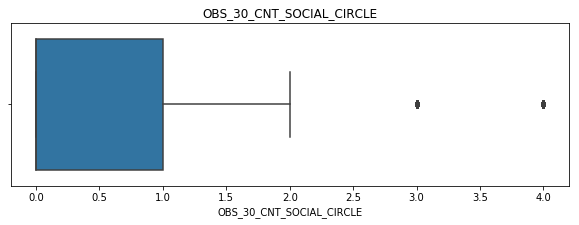

In [ ]:
#calling function for Outlier removal on OBS_30_CNT_SOCIAL_CIRCLE

outlier_treatment("OBS_30_CNT_SOCIAL_CIRCLE")


Total number of outliers 29027
Total number of non-outliers 278484
Lower quartile -3.0
Upper quartile 5.0


Plot after removing outliers


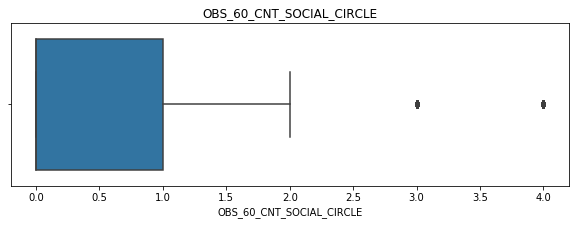

In [ ]:
#calling function for Outlier removal on OBS_60_CNT_SOCIAL_CIRCLE
outlier_treatment("OBS_60_CNT_SOCIAL_CIRCLE")

<function matplotlib.pyplot.show(*args, **kw)>

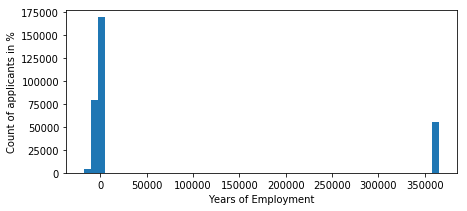

In [ ]:
#Outlier treatment on "DAYS_EMPLOYED" (How many days before the application the person started current employment)
#Clearly from the previous plot, there is an outlier in DAYS_EMPLOYED  on dataset
plt.figure(figsize=(7,3))
plt.hist(test_df['DAYS_EMPLOYED'],bins=50)
plt.xlabel('Years of Employment')
plt.ylabel('Count of applicants in %')
plt.show

In [ ]:
#The data looks strange as we have -365243 days of employment which is impossible
#looks like there is data entry error which is clearly an oulier and we are replacing it as null values

error = test_df[test_df['DAYS_EMPLOYED'] == 365243]
print('The no of errors are :', len(error))
(error['TARGET'].value_counts()/len(error))*100

The no of errors are : 55374


0    94.600354
1     5.399646
Name: TARGET, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

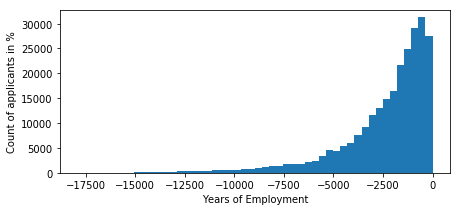

In [ ]:
#we are replacing the outlier with null values
plt.figure(figsize=(7,3))
test_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
application_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
plt.hist(test_df['DAYS_EMPLOYED'],bins=50)
plt.xlabel('Years of Employment')
plt.ylabel('Count of applicants in %')

plt.show

### Univariate Analysis

###  Analysis on Continuous variables

Data Imbalance check :

Total percentage of clients who paid loans 91.9
Total percentage of clients who has payment difficulties 8.1


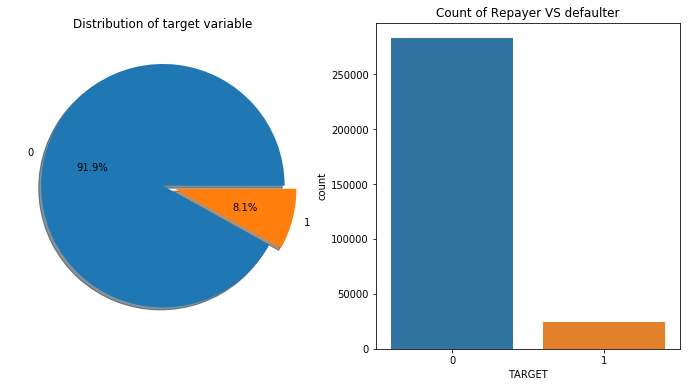

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))

#Data Imbalance percentage calculation
client_who_paid_loans =test_df.groupby("TARGET")["TARGET"].count()[0]
client_with_payment_difficulties =test_df.groupby("TARGET")["TARGET"].count()[1]
client_who_paid_loans_percentage = (client_who_paid_loans/test_df.shape[0])*100
client_with_payment_difficulties_percentage = (client_with_payment_difficulties/test_df.shape[0])*100
print("\033[1mTotal percentage of clients who paid loans\033[0m",round(client_who_paid_loans_percentage,1))
print("\033[1mTotal percentage of clients who has payment difficulties\033[0m",round(client_with_payment_difficulties_percentage,1))

#subplot-1 PIE CHART DATA IMBALANCE
test_df.TARGET.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution of target variable')
ax[0].set_ylabel('')


#subplot-2 BAR PLOT DATA IMBALANCE
sns.countplot('TARGET',data=test_df,ax=ax[1])
ax[1].set_title('Count of Repayer VS defaulter')
plt.show()

#### Binning on Continuous Variable

In [ ]:
#Function to create bins on continuous variables with respect to Target
def continuous_variables_with_Target(data,number1,number2,number3,bins):

    new_df = pd.DataFrame(test_df,columns=[data,"TARGET"])
    new_df2=new_df[new_df["TARGET"]== 1]
    
    # Binning on continuous variable
    new_df[str(data) +'  - Binned'] = pd.cut(new_df[data],bins)
    new_df.groupby(str(data) +'  - Binned')[str(data) +'  - Binned'].count().plot(kind="bar",ax=ax[number1,number2])
    
    #Binning +Percentage of Target variable=1
    new_df2['Binned'] = pd.cut(new_df2[data],bins)
    (new_df2.groupby('Binned')['Binned'].count()/new_df.shape[0]).plot(kind="bar",color='Orange',title="percentage of target=1",ax=ax[number1,number3])

####  Type driven metrics : 

Here creating a new column "Binned" (Type driven metrics) in order to bin the total range into different buckets  to have easy visualization

#### Analysis on Loan Variables

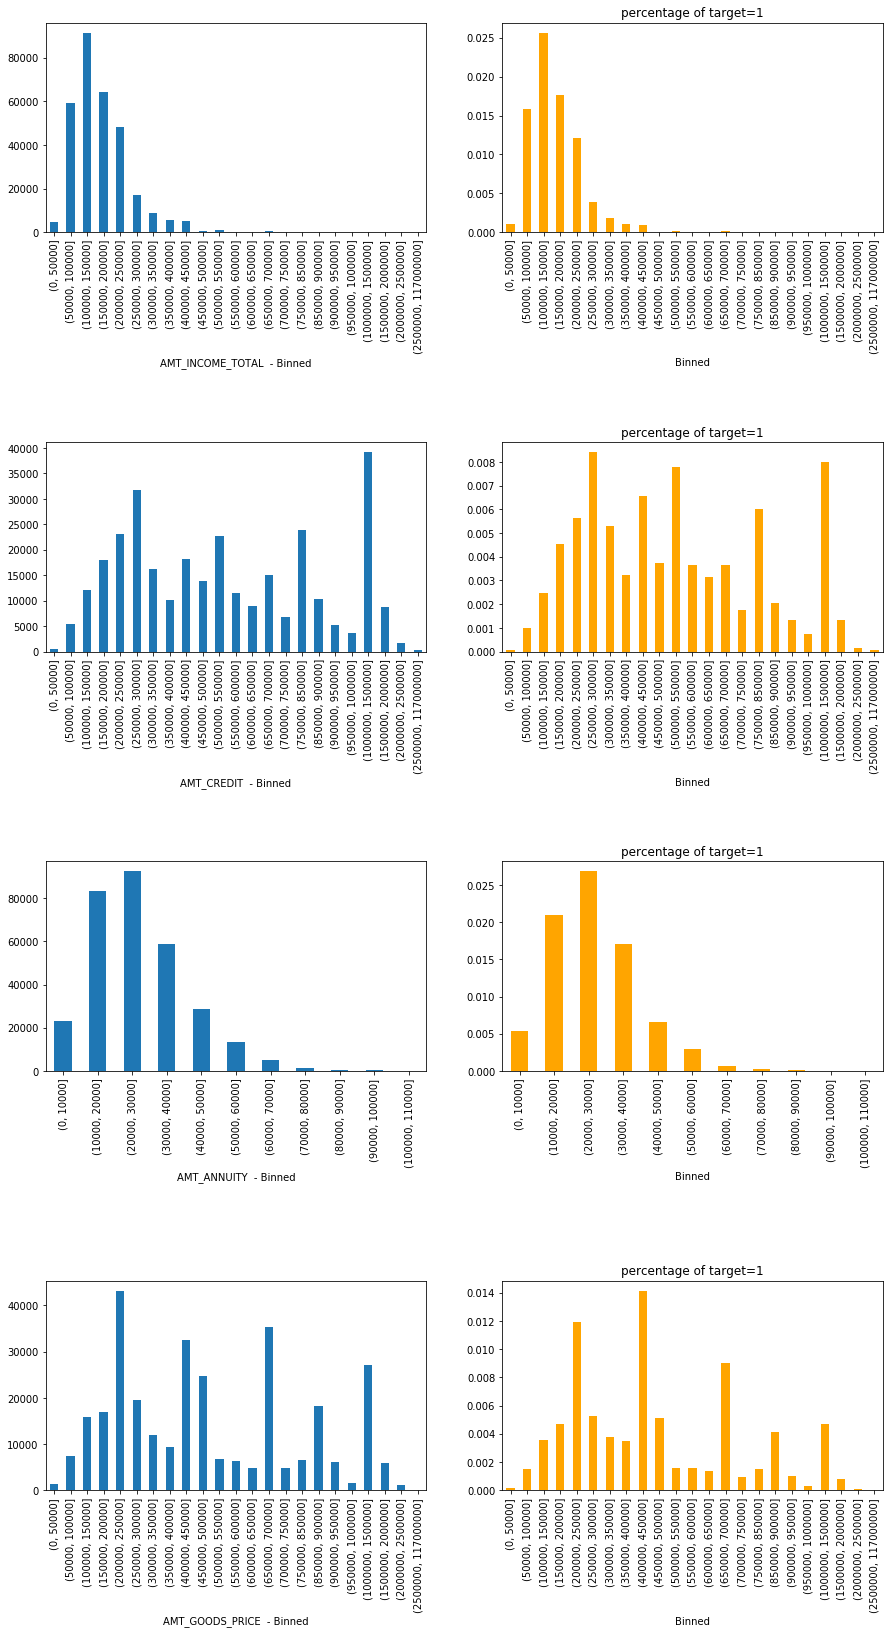

In [ ]:
#creating subplots
f, ax = plt.subplots(4,2, figsize=(15,27))
plt.subplots_adjust( hspace = 1)

#Bin size
bins= [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 850000,900000, 950000, 1000000,1500000,2000000,2500000, 117000000 ]


#Analysis on Total Income on Applicants
continuous_variables_with_Target('AMT_INCOME_TOTAL',0,0,1,bins)

#Analysis on Credit amount of the loan
continuous_variables_with_Target('AMT_CREDIT',1,0,1,bins)


#Analysis on Loan annuity
continuous_variables_with_Target('AMT_ANNUITY',2,0,1,bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000])


#Analysis on AMT_GOODS_PRICE
continuous_variables_with_Target('AMT_GOODS_PRICE',3,0,1,bins)

**Inferences**:

1.**AMT_INCOME_TOTAL** :

If we see the above given distrbution plot it clear say major distrbuiton for amount of anual income is from 0 to 4,50,000 and people with total annual income lying between 100000 and 150000 avail more loans.

**higher chance of default**: people with total income between **100000 and 150000**


2.**AMT_CREDIT**:

Similarly, people has more credit on range 10,00,000 to 15,00,000 for applying loan

**higher chance of default** : people with more credit on range **2,50,000 to 3,00,000**

3.**AMT_ANNUITY**:

People have more annuity on range 20,000 to 30,000


**higher chance of default** : people with more annuity range **20,000 to 30,000**


4.**AMT_GOODS_PRICE** :

Maximum loans were given for goods with price range 2,00,000 to 2,50,000

**higher chance of default** :people with good price range between **4,00,000 to 5,00,000**


#### Data Driven Metrics

In [ ]:
#Creating data driven metrics to analyze the relation between the metrics and the Target variable

test_df['ratio__AMT_CREDIT__ANNUITY_RATIO'] = test_df['AMT_CREDIT'] / test_df['AMT_ANNUITY']
#test_df['ratio__AMT_CREDIT__ANNUITY_RATIO']

test_df['ratio__AMT_INCOME_TOTAL__AMT_CREDIT'] = test_df['AMT_INCOME_TOTAL'] / test_df['AMT_CREDIT']
#test_df['ratio__AMT_INCOME_TOTAL__AMT_CREDIT']

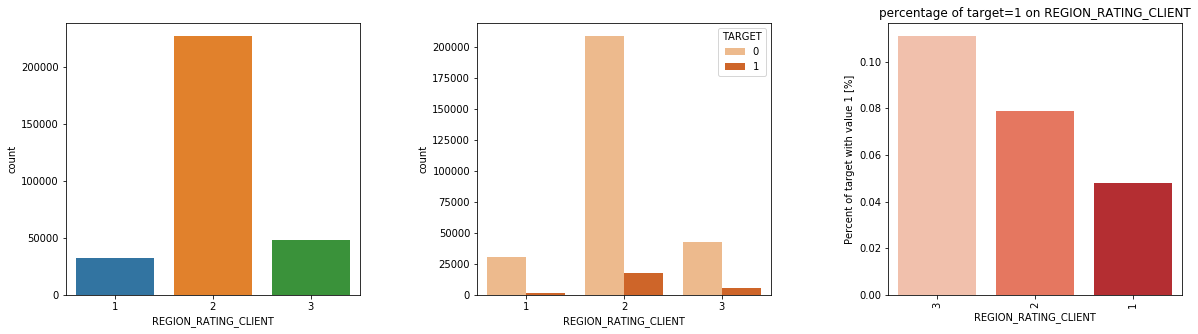

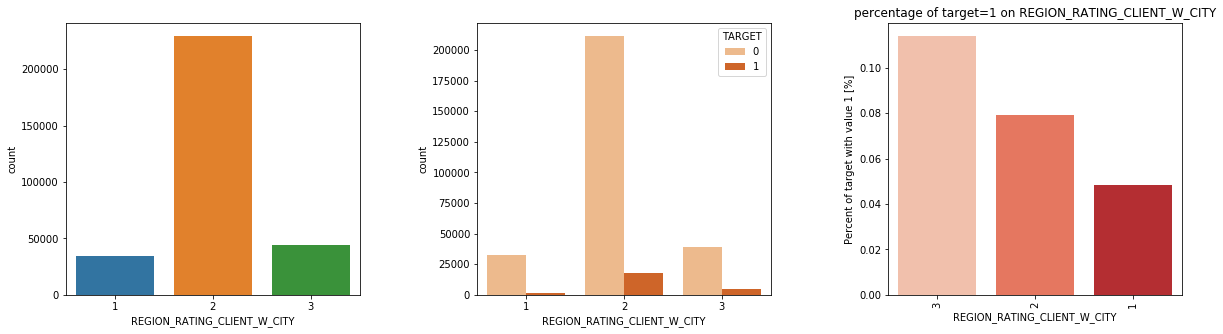

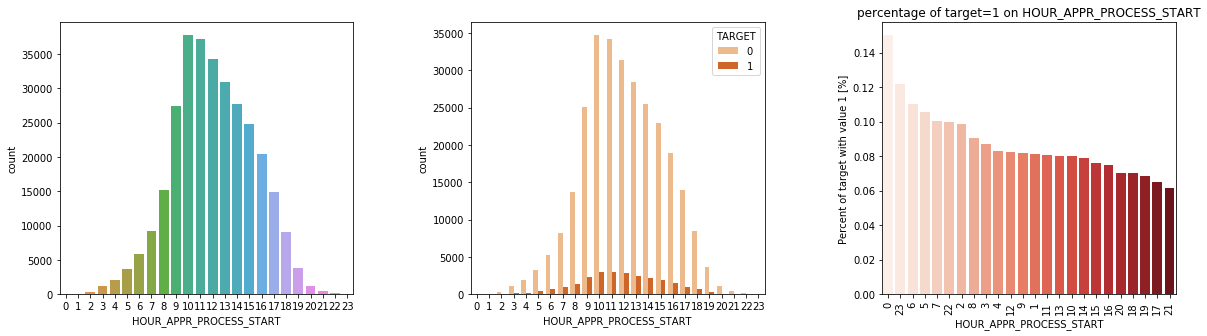

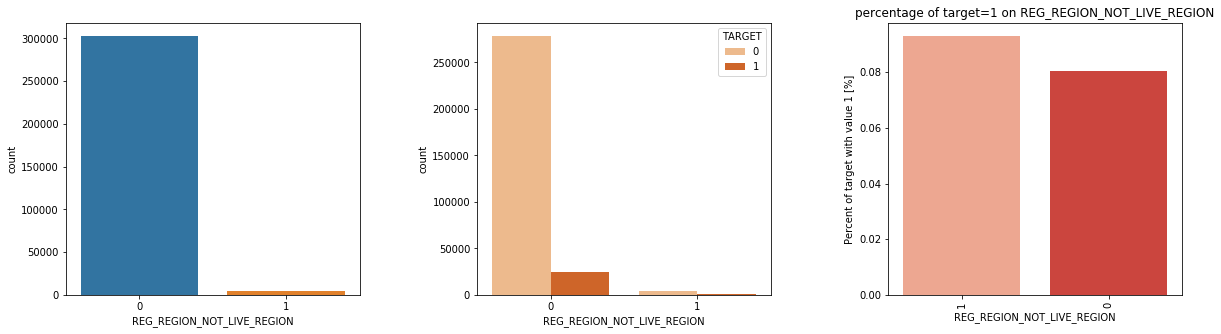

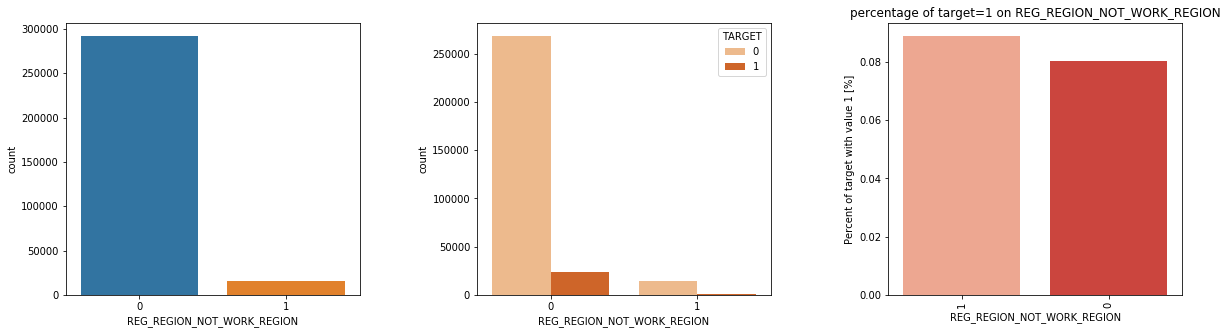

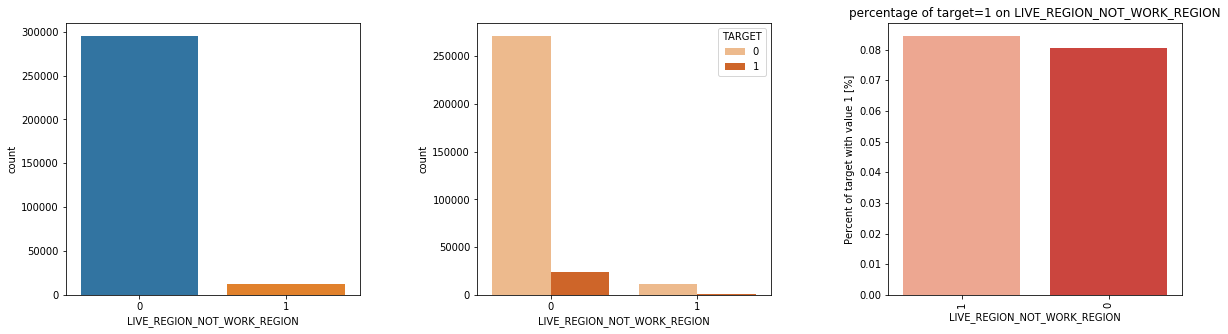

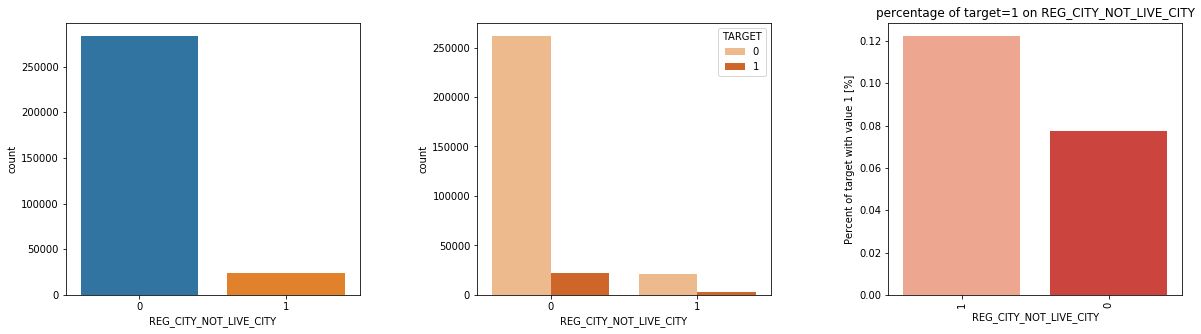

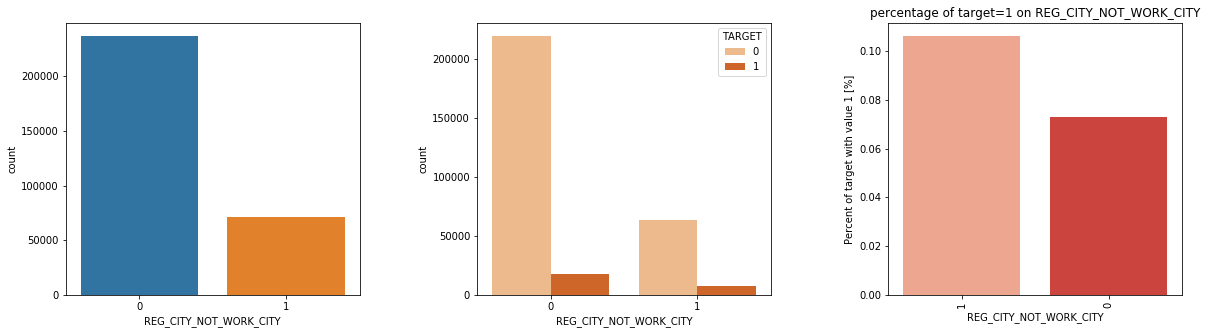

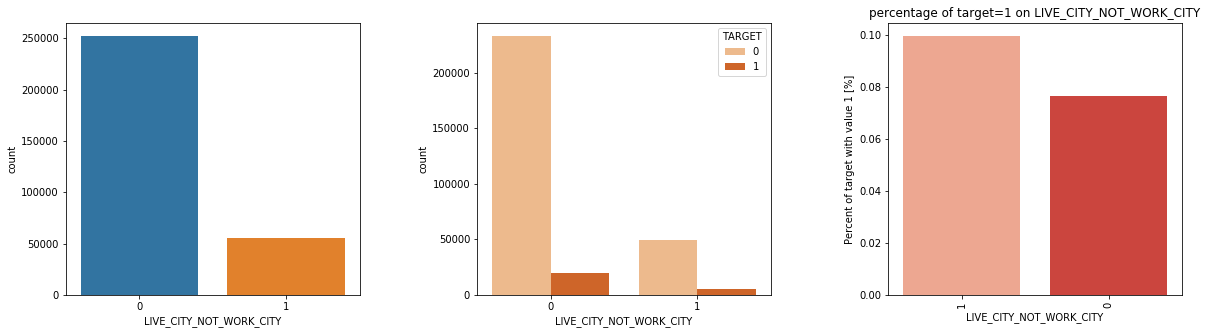

In [ ]:
analysis_columns= ['REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', "ratio__AMT_CREDIT__ANNUITY_RATIO"]


for i in analysis_columns:
    plt.figure(figsize = (20,5))
    plt.subplots_adjust(hspace=1.5,wspace=0.4)
    
    
    plt.subplot(1,3,1)
    sns.countplot(test_df[i])
    
    
    plt.subplot(1,3,2)
    sns.countplot(test_df[i],hue=test_df['TARGET'],palette="Oranges")
    
    
    plt.subplot(1,3,3)
    cat_perc = test_df[[i, 'TARGET']].groupby([i],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    s = sns.barplot(x = i, y='TARGET', order=cat_perc[i], data=cat_perc,palette="Reds")
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.title("percentage of target=1 on "+i)
    plt.show()
    
    

Inferences : From above plot,it can be seen that


1.Clients with Region_rating of 3 are the top loan defaulters than the client with Region_rating of 2 and 1.


2.Clients with Region_rating of 3 after taking city into account are again  the top loan defaulters than the client with Region_rating of 2 and 1.

3.More number of clients applying loan during 10 to 12am have less chance of loan defaulting than the people who apply late in the evening.

4.Clients with different permanent and contact address at region level, have high chances of being loan defaulters than the clients with same address.

5.Clients with different permanent and work address at region level, have high chances of being loan defaulters than the clients with same address.

6.Clients with different contact and work address at region level, have high chances of being loan defaulters than the clients with same address.

7.Clients with different permanent and contact address at city level, have high chances of being loan defaulters than the clients whose address are same.

8.Clients whose permanent address is different from work address at city level, are also among the highest loan defaulters than the clients whose both the address are same.

9.Clients whose contact address does not match work address have high chances of loan defaulting than the clients whose both the address are same.

In [ ]:
analysis_columns= ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']


for i in analysis_columns:
    plt.figure(figsize = (20,5))
    plt.subplots_adjust(hspace=1.5,wspace=0.4)
    
    
    plt.subplot(1,3,1)
    sns.countplot(test_df[i])
    
    
    plt.subplot(1,3,2)
    sns.countplot(test_df[i],hue=test_df['TARGET'],palette="Oranges")
    
    
    plt.subplot(1,3,3)
    cat_perc = test_df[[i, 'TARGET']].groupby([i],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    s = sns.barplot(x = i, y='TARGET', order=cat_perc[i], data=cat_perc,palette="Reds")
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.title("percentage of target=1 on "+i)
    plt.show()
    

Inference:

From the previous plots it is evident that who has provided mobile phone number,work phone number and home phone number is less likely to pay the loan.

Also there is no much difference when they provide Email 



### Uni Variate Analysis

#### Analysis on Categorical Variable

In [ ]:
def category_plot(data1, data2):

    f,ax=plt.subplots(1,3,figsize=(15,5) )
    plt.subplots_adjust(hspace=1,wspace=0.3)

    #subplot-1 - Categorized based on column
    k=test_df.groupby(data1)[data1].count().sort_values(ascending = False)
    k.plot(kind="bar",ax=ax[0])
    ax[0].set_title('count of customer Based on '+data1)
    
    #subplot-2 - Categorized based on Target Variable
    s=sns.countplot(data1,hue=data2,data=test_df,palette="Oranges",ax=ax[1])
    ax[1].set_title(data1+': Repayer vs Defualter')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    
    #subplot-3 - Calculate the percentage of target=1 per category value
    cat_perc = test_df[[data1, data2]].groupby([data1],as_index=False).mean()
    cat_perc.sort_values(by=data2, ascending=False, inplace=True)
    print(cat_perc)
    s = sns.barplot(ax=ax[2], x = data1, y=data2, order=cat_perc[data1], data=cat_perc,palette="Reds")
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax[2].set_title("percentage of target=1 on "+str(data1))


#### Analysis on Code gender

In [ ]:
category_plot('CODE_GENDER','TARGET')

Clearly seen from above figures, Males being less applicant of loans, but has a high chance of being a loan defaulter

#### Analysis on Education Type

In [ ]:
category_plot('NAME_EDUCATION_TYPE','TARGET')

From the above given plot it is clearly seen that the customer with "lower secondary education" apply for less number of loans. But they could not repay the loan,  making them have a high chance of loan defaulter in the list.

In [ ]:
category_plot('NAME_INCOME_TYPE','TARGET')

From above graph it is seen that working professionals apply for more number of loans but they have less chances of being  loan defaulters whereas customers on maternity leave are topmost in loan defaulter list among name_income_type category 

In [ ]:
category_plot('OCCUPATION_TYPE','TARGET') 

It can be seen from above graph that Low skill laborers apply for less number of loans but are in the highest category of loan defaulter followed by drivers, waiters and barmen staff.

In [ ]:
category_plot('NAME_FAMILY_STATUS','TARGET')

It can be clearly seen from above plot that civil marriage category customers has higher chances of being loan defaulter whereas widow category being the least defaulter

In [ ]:
category_plot('NAME_HOUSING_TYPE','TARGET')

From above grap, we can see that people staying in House/apartments apply for more number of loans but people staying in rented apartments have the high chances of being loan defaulter among Name_housing_type category

In [ ]:
category_plot('NAME_TYPE_SUITE','TARGET')    

It can be clearly seen from above plot that most of the people apply loan being unaccompanied but customers of other _B category have more chance of not being able to repay the laon on time, becoming the highest loan defaulter among Name_Type_Suite category

In [ ]:
category_plot('FLAG_OWN_CAR','TARGET')


It can be seen from above plot that people who do not own a car, have the high chance of being loan defaulter than the people who own a car.

In [ ]:
category_plot('FLAG_OWN_REALTY','TARGET')

From above plot, we can see that people who do not have their own house/flat apply for less number of loans but has high chances of being defaulters than the people who have their own house or flat.

In [ ]:
category_plot('NAME_CONTRACT_TYPE','TARGET')

From above plot, it can be seen that people with cash loans have the high chance of being loan defaulter than people with revolving loans.

In [ ]:
category_plot('CNT_CHILDREN','TARGET')

It can be clearly seen from above plot that the customers having more number of children, have high chances of not paying the loan than the other customers who have one or two children. 

In [ ]:
category_plot('CNT_FAM_MEMBERS','TARGET')

It can be seen from above plot that more the number of members in a family, higher the chances of being a loan defaulter.

##### Analysis on External source and Region population relative

In [ ]:
def plot_distribution(data,number1,number2):
    # Set up the matplotlib figure
    if(data=='EXT_SOURCE_1'):
        df1 = application_data.loc[test_df['TARGET'] != 0]
        df0 = application_data.loc[test_df['TARGET'] == 0]
        #print(df0.head())
    else:
        df1 = test_df.loc[test_df['TARGET'] != 0]
        df0 = test_df.loc[test_df['TARGET'] == 0]
        
    sns.distplot(df0[data].dropna(), kde=True, color="b",
             ax=ax[number1,number2],label="TARGET = 0").set_title(str(data)+' Distribution')
    sns.distplot(df1[data].dropna(), kde=True, color="orange",
             ax=ax[number1,number2],label="TARGET = 1").set_title(str(data)+' Distribution')
   
        
  
print("orange = defaulters")
print("blue   = Non defaulters")
     
f, ax = plt.subplots(nrows=2,ncols=2,figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

plot_distribution('EXT_SOURCE_1',0,0)
plot_distribution('EXT_SOURCE_2',0,1)
plot_distribution('EXT_SOURCE_3',1,0)
plot_distribution('REGION_POPULATION_RELATIVE',1,1)




Inference :

1.**External source 1** shows a negative correlation with Target variable. When the Points from External Source gets higher, there is a higher chance of customer being default and shows maximum default at range 0.5 to 0.7

2.**External source 2**- There is a moderation distibution among defaulters in all range while there is maximum range for non defaulters when the ranger is higher at 0.6 and 0.8

3.**External source 3** - There is similar to distribution to distribution 1, When the Points from External Source gets higher, there is a higher chance of customer being default and shows maximum default at range 0.6 to 0.8 

4.**Region population relative** - There is maximum default happening at 0.02
    

##### Analysis on 'DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH'

In [ ]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    df1 = test_df.loc[test_df['TARGET'] != 0]
    df0 = test_df.loc[test_df['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for data in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(df1[data], bw=0.5,label="TARGET = 1")
        sns.kdeplot(df0[data], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(data, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [ ]:

var = ['DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']

plot_distribution_comp(var,nrow=2)

Inference:

1.From the previous plot, the applicants with less than 5 years of employment (-2500)are less likely to repay the loan.

2.The applicants with less than 5 years (-2500) of Registration_days (How many days before the application did client change his registration) are less likely to repay the loan

3.The applicants who are at thier 30's (1000) are less likely to repay the loan, while it decreases when tha age increases. Also, people less than 20(-8000) repay their loans

4.The applicants who changed the identity document with which he applied for the loan  before 10 days (-4000) are less likely to repay the loan

### Correlation Analysis on Application Dataset

In [ ]:
test_df_corr = test_df.corr()
test_df_corr_target = test_df_corr['TARGET'].sort_values(ascending = False)

print("")
print("\033[1mThe following are the top 10 positively correlated fields\033[0m")
print('+ve corr: \n{0}'.format(test_df_corr_target.head(10)))


print("")
print("\033[1mThe following are the top 10 negatively correlated fields\033[0m")
print('-ve corr: \n{0}'.format(test_df_corr_target.tail(10)))



''' 
**Correlation value :**

    00-.19 “very weak”

    20-.39 “weak”
    
    40-.59 “average”
    
    60-.79 “strong”
    
    80-1.0 “very strong” 
'''

From the previous plot, as we can see EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','DAYS_BIRTH','DAYS_EMPLOYED' are more correlated features, hence examining a little closer through heat map

#### Heat Map Analysis on External Sourc

In [ ]:
plt.figure(figsize=(10,10))
df_ext_src = application_data[['TARGET','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','DAYS_BIRTH','DAYS_EMPLOYED']] 
df_ext_src_corr = df_ext_src.corr()
sns.heatmap(df_ext_src_corr,vmin=-1.0,vmax=1.0,annot=True)


**Inference:**
    
The heat map shows that all the external sources show a negative correlation with the Target 

#### Graphical analysis- pairplot and a pairgrid 

We have a 6x6 grid in pairplot and it is plotted towards TARGET variable is explicitly differentiated through coloring scheme (i.e., hue). In this pairgrid TARGET is denoted by the hue. Orange is TARGET=1 (default), and Blue is TARGET=0 (no default).



**Upper triangle:** consist of a scatter plot between the two variables in the X & Y axes, and has the TARGET variable as a different hue.

**Diagonal:** This is a kde plot of the distribution of each variable.


**Bottom triangle:** This is a kde plot.


In [ ]:
#create a pairplot and a pairgrid to have a graphical analysis of the most important features of the dataset
#taking a sample of 5000
df_ext_src_sample = df_ext_src.dropna().sample(5000)
grid = sns.PairGrid(data = df_ext_src_sample, diag_sharey=True,
                    hue = 'TARGET', 
                    vars = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH'])

grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);


Having a look at previous plot, DAYS_BIRTH and EXT_SOURCE_, we can see that for TARGET=1 (i.e., orange) there is a high negative correlation. 

### Joining Previous data set to Application Data set

In [ ]:
application_prev_df = application_data.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [ ]:
print("The resulting dataframe `application_prev_df` has ",application_prev_df.shape[0]," rows and ", 
      application_prev_df.shape[1]," columns.")

### Univaraiate analysis on combined data set

In [ ]:
def plot_stats(data1):
    temp = application_prev_df[data1].value_counts()
    df1 = pd.DataFrame({data1: temp.index,'Total Number': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_prev_df[[data1, 'TARGET']].groupby([data1],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    
    #Bar plot for total count
    s = sns.barplot(ax=ax1, x = data1, y='Total Number',data=df1)  
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    #Percentage plot for Target variable=1
    s = sns.barplot(ax=ax2, x = data1, y='TARGET', order=cat_perc[data1], data=cat_perc)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
        
    plt.ylabel('Total Percent [%]of target with value 1 ', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
 
    plt.show();

In [ ]:
plot_stats('NAME_CONTRACT_TYPE_y')

People with Revolving loans has the higher chance of being a default, while in the application data set people with Cash loans had the higher chance of default

In [ ]:
plot_stats('NAME_CASH_LOAN_PURPOSE')

XAP, XNA counts are higher, which are missing data and this needs to be removed. Apart from this - Repairs, Other, Urgent needs, Buying a used car, Building a house or an annex accounts for the largest number of contracts.

when looking at the percent of defaults for current applications in the sample, Refusal to name the goal - ~23% , Hobby (20%), Car repairs (~18%).


In [ ]:
plot_stats('NAME_CONTRACT_STATUS')

Most previous applications statuses are in  Approved (~850K), Canceled and Refused (~240K). There are only ~20K in status Unused offer.

from the above plot the percent of defaults are Refused (12%), followed by Canceled (9%), Unused offer (~8%) and Approved (lowest percent of defaults in current applictions, with less than 8%).


In [ ]:
plot_stats('NAME_PAYMENT_TYPE')

Looking at the plot higher number of previous applications were paid with Cash through the bank (~850K). Payments using Non-cash from your account or Cashless from the account of the employer are very less. 

And in the percentage distribution these three types of payments in previous applications results is almost the same 

In [ ]:
plot_stats('NAME_CLIENT_TYPE')

Most of the previous applications have client type Repeater (~1M), just over 200K are New and ~100K are Refreshed.

In terms of default percent for current applications of clients with history of previous applications, current clients with previous applications have values of percent of defaults ranging from from 8.5%, 8.25% and 7% corresponding to client types in the past New, Repeater and Refreshed, respectivelly.



### Correlation Analysis on Combined Dataset

In [ ]:
column_list=[]

for i in application_prev_df.columns:
    if  i not in application_data.columns:
        column_list.append(i)
new_df=application_prev_df[column_list]
new_df["TARGET"]=application_data["TARGET"]
#print(new_df.columns)


test_df_corr = new_df.corr()
test_df_corr_target = test_df_corr['TARGET'].sort_values(ascending = False)

print("")
print("\033[1mThe following gives the correlation value\033[0m")
print('+ve corr: \n{0}'.format(test_df_corr_target))

'''    00-.19 “very weak”
    20-.39 “weak”
    40-.59 “average”
    60-.79 “strong”
    80-1.0 “very strong” 
'''

From the correlation, we cannot conclude as there are no strong correlation with respect to Target variable